In [1]:
import time
import multiprocessing as mp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

from nfl_pickem import Pickem

In [2]:
pk = Pickem()
print(pk.file_path)
pk.pull_data()
df = pk.build_schedule()

../nfl-pickem/data/nfl_games.csv
Data successfully pulled!
Seasons 1920-2017: 16007 Games


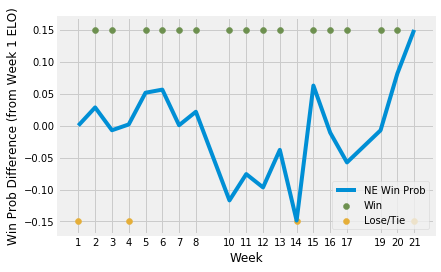

In [3]:
team = 'NE'
cond = df.team == team
plt.plot(df[cond].week.values,
         df[cond].win_prob.values - df[cond].elo_prob1.values,
         label=team+' Win Prob')
plt.scatter(df[cond&(df.result1 > 0.9)].week.values,
            0.3*df[cond&(df.result1 > 0.9)].result1.values - 0.15,
            label='Win', c='C3')
plt.scatter(df[cond&(df.result1 < 0.9)].week.values,
            0.3*df[cond&(df.result1 < 0.9)].result1.values - 0.15,
            label='Lose/Tie', c='C2')
plt.ylabel('Win Prob Difference (from Week 1 ELO)')
plt.xlabel('Week')
plt.xticks(df[cond].week.values,
           df[cond].week.values)
plt.legend(loc='lower right')
plt.show()

## Historical Validation

In [ ]:
pk = Pickem()
pk.pull_data()

In [ ]:
def run_strategy(max_week, season):
    picks = pd.DataFrame()
    columns = ['team1', 'win_prob', 'result1', 'week']
    for week in range(1, 18):
        ts = pk.build_schedule(season=season,
                               elo_week=week)
        if week > 1:
            ts = ts[~ts.team1.isin(picks.team1)].reset_index()
        max_week = min(ts.week.max(), max_week)
        ind = pk.pick_optimization(
            ts[ts.week <= week + max_week]
        )
        picks = picks.append(ts.loc[ind[0], columns])
    
    return picks

In [ ]:
def run_season(season):
    start = time.time()
    tmp = pk.build_schedule(season=season)
    reg_season_len = tmp[tmp.playoff < 0.9].week.max()
    for max_week in range(0, reg_season_len):
        ind_start = time.time()
        picks = run_strategy(max_week=max_week,
                             season=season)
        status = '%i, '%season
        status += 'Max Week: %i, '%max_week
        status += 'Time: %.3fs, '%(time.time()-ind_start)
        status += 'Correct: %i/%i, '%(picks.result1.sum(), 
                                    picks.shape[0])
        if picks.result1.sum() < 16:
            status += 'Elimination Week: %i'%(
                picks[picks.result1 < 0.9].week.values[1])

        print(status)
    print('Total time: %.3fs'%(time.time()-start))

In [ ]:
run_season(2015)